In [53]:
import numpy as np
from scipy.stats import norm, expon, chi2, uniform
import matplotlib.pyplot as plt
import pandas as pd
import copy
import random
%matplotlib inline

# Standard distributions sampling
## Ex 1.
Use scipy to take samples from the following distributions:
1. Normal distribution with $\mu$=1 and $\sigma$=4,
2. Exponential distribution with $\lambda = \dfrac{1}{4}$,
3. Chi-squared distribution with 8 degrees of freedom,
4. Uniform distribution with borders [$-2\sqrt{3}, 6\sqrt{3}$].

Compare their theoretical and sample distribution, mean and variance.

In [54]:
names = ['Normal', 'Exponential', 'Chi2', 'Uniform']
distributions = [
    norm(loc=1, scale=4),
    expon(scale=4),
    chi2(df=8),
    uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3))
]

In [55]:
def show_probability_density_function(dist, name):
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    r = dist.rvs(size=1000)

    fig, ax = plt.subplots(1, 1)
    ax.plot(x, dist.pdf(x), 'r-', lw=5, alpha=0.6, label=f'{name} pdf')
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=x[::4])
    ax.legend(loc='best', frameon=False)
    plt.show()

    print(f"Distribution mean: {dist.stats(moments='m')}")
    print(f"Distribution variance: {dist.stats(moments='v')}")
    print(f"Sample mean: {np.mean(r)}")
    print(f"Sample variance: {np.var(r)}")

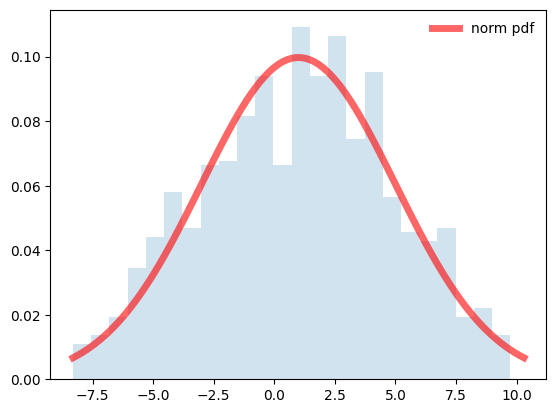

Distribution mean: 1.0
Distribution variance: 16.0
Sample mean: 0.9548219915933817
Sample variance: 18.603877497698843


In [56]:
#1. Normal
#This one I'll do for you :-)

rv_norm = norm(loc = 1, scale = 4)
x = np.linspace(rv_norm.ppf(0.01), rv_norm.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = rv_norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins = x[::4])


ax.legend(loc='best', frameon=False)
plt.show()

print("Distribution mean: {0}".format(rv_norm.stats(moments='m')))
print("Distribution variance: {0}".format(rv_norm.stats(moments='v')))
print("Sample mean: {0}".format(np.mean(r)))
print("Sample variance: {0}".format(np.var(r)))

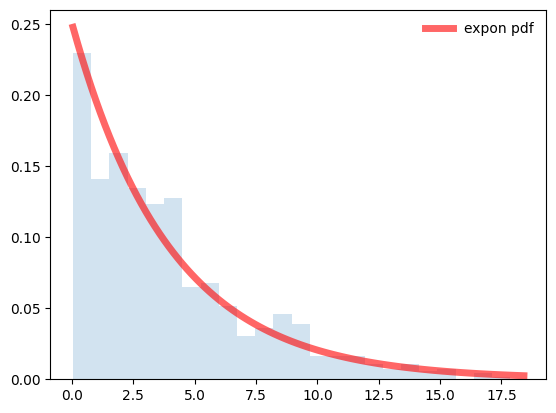

Distribution mean: 4.0
Distribution variance: 16.0
Sample mean: 4.15543471732266
Sample variance: 17.09825100341227


In [57]:
# Exponential
# here goes your code
show_probability_density_function(expon(scale=4), 'expon')
#hint: expon

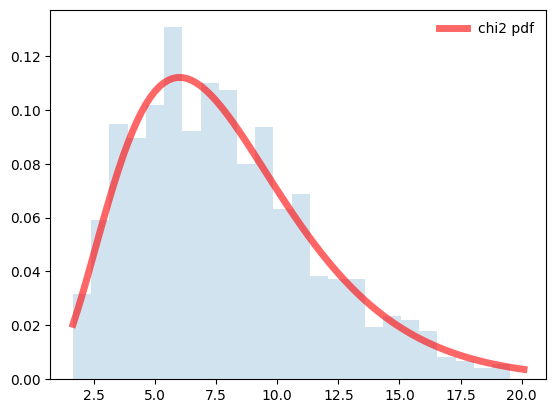

Distribution mean: 8.0
Distribution variance: 16.0
Sample mean: 7.9284984660977225
Sample variance: 15.913408582691606


In [58]:
# chi2
# here goes your code
show_probability_density_function(chi2(df=8), 'chi2')
#hint: chi2

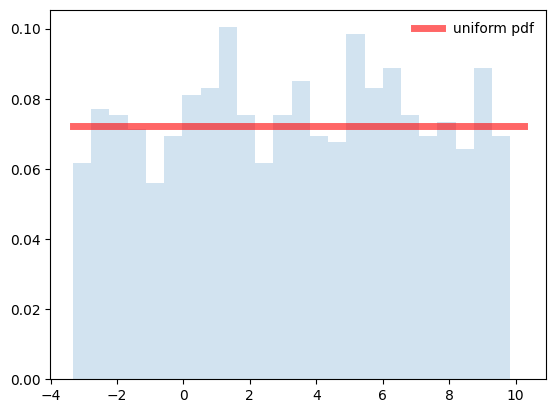

Distribution mean: 3.4641016151377544
Distribution variance: 15.999999999999998
Sample mean: 3.520808686327089
Sample variance: 15.709038120639034


In [59]:
#uniform
#here goes your code
show_probability_density_function(uniform(loc=-2*np.sqrt(3), scale=8*np.sqrt(3)), 'uniform')
#hint: uniform

## Note:
    All sample means and variances were pretty close to the theoretical ones.
    We can make them more precise by increasing the samples amount.

# Low of large numbers. Central Limit Theorem.
## Ex 2.
a) For N from 2 to 1000 draw N samples from distributions defined in Ex 1. Plot sample variance and mean against the size of the sample. 

In [60]:
def show_results(values, stat):
    indicies = np.array([198 + 200*i for i in range(5)])
    x = [[values[name][idx] for idx in indicies] for name in names]
    data = [
        [
            np.round(dist.stats(moments=stat), 3),
            *_x
        ]
        for _x, dist in zip(x, distributions)
    ]
    return pd.DataFrame(
        data,
        columns=['theoretical', *[f'size={i}' for i in indicies+2]],
        index=names
    )

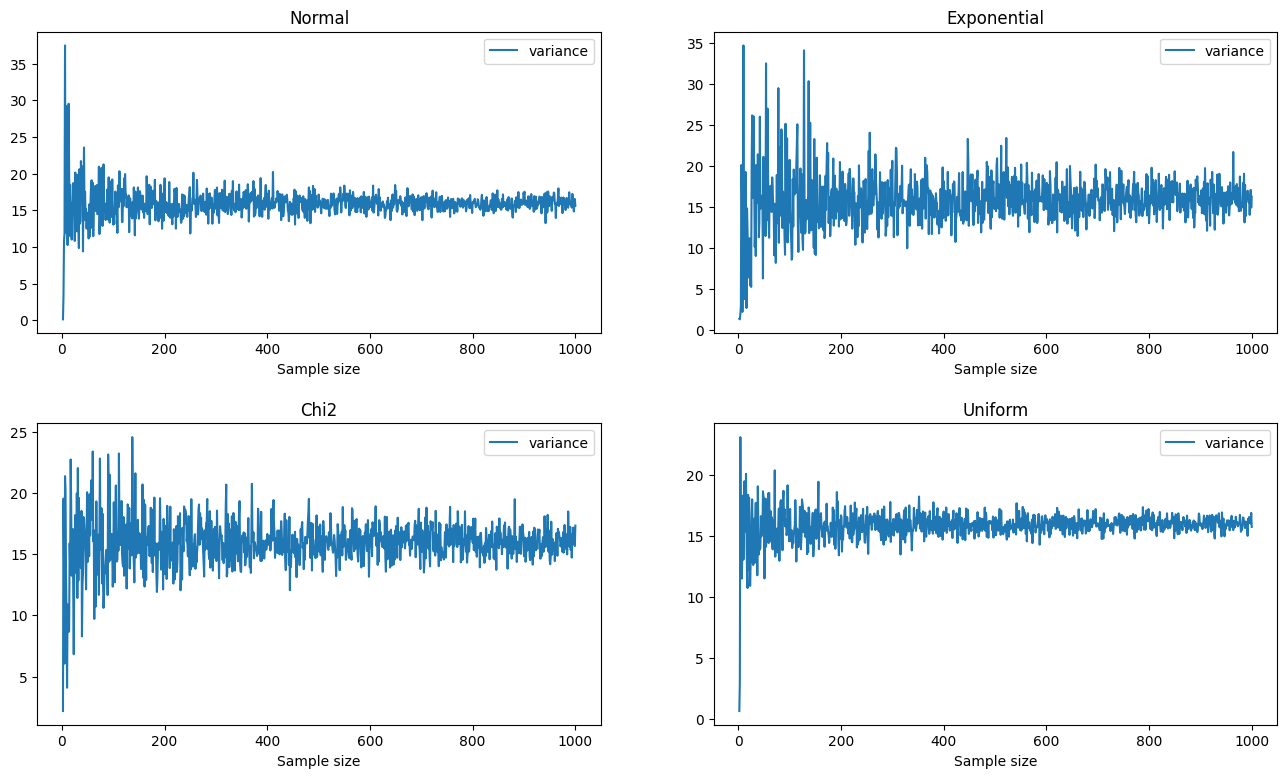

,theoretical,size=200,size=400,size=600,size=800,size=1000
Normal,16.0,19.361700,16.802530,16.142024,16.090870,15.612824
Exponential,16.0,14.631617,18.104499,14.684009,12.972335,16.203660
Chi2,16.0,13.361741,16.642371,15.834531,15.930440,17.321554
Uniform,16.0,16.699561,17.008615,16.074535,16.217043,15.750463


In [61]:
#here goes your code

def compute_sample_stats(dist, size):
    samples = dist.rvs(size=size)
    return np.var(samples), np.mean(samples)

variances, means = [{name: [] for name in names} for _ in range(2)]

N = (2, 1001)
for size in np.arange(*N):
    for dist, name in zip(distributions, names):
        variance, mean = compute_sample_stats(dist, size)
        variances[name].append(variance)
        means[name].append(mean)
    
fig, axs = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.3)

for i, key in enumerate(names):
    axs[i//2, i % 2].plot(np.arange(*N), variances[key], label='variance')
    axs[i//2, i % 2].legend()
    axs[i//2, i % 2].set_title(key)
    axs[i//2, i % 2].set_xlabel('Sample size')
plt.show()
show_results(variances, 'v')

## Note:
    All sampled variances tend to the theoretical values when the sample size increases

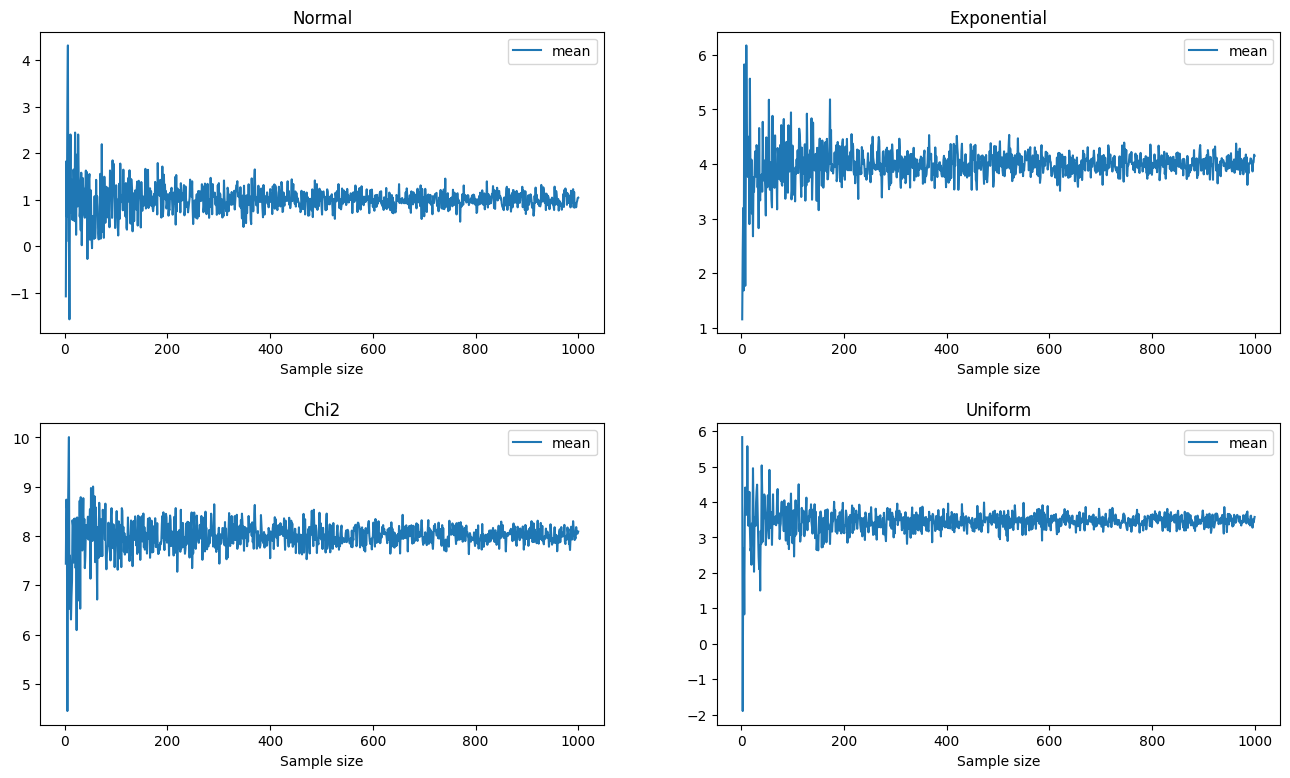

,theoretical,size=200,size=400,size=600,size=800,size=1000
Normal,1.000,1.035376,1.229412,0.848889,0.911233,1.046527
Exponential,4.000,4.016881,4.064574,4.134899,3.802086,4.149199
Chi2,8.000,7.914717,7.550302,7.994311,7.942908,8.091863
Uniform,3.464,3.158381,3.332853,3.318803,3.295314,3.578540


In [62]:
fig, axs = plt.subplots(2, 2, figsize=(16, 9))
fig.subplots_adjust(hspace=0.3)
for i, key in enumerate(names):
    axs[i//2, i % 2].plot(np.arange(*N), means[key], label='mean')
    axs[i//2, i % 2].legend()
    axs[i//2, i % 2].set_title(key)
    axs[i//2, i % 2].set_xlabel('Sample size')
plt.show()
show_results(means, 'm')

## Note:
    All sampled means tend to the theoretical values when the sample size increases

## Ex 3.
For N=1,4,9,16 draw histograms of an average over N samples taken from distributions defined in Ex 1. 

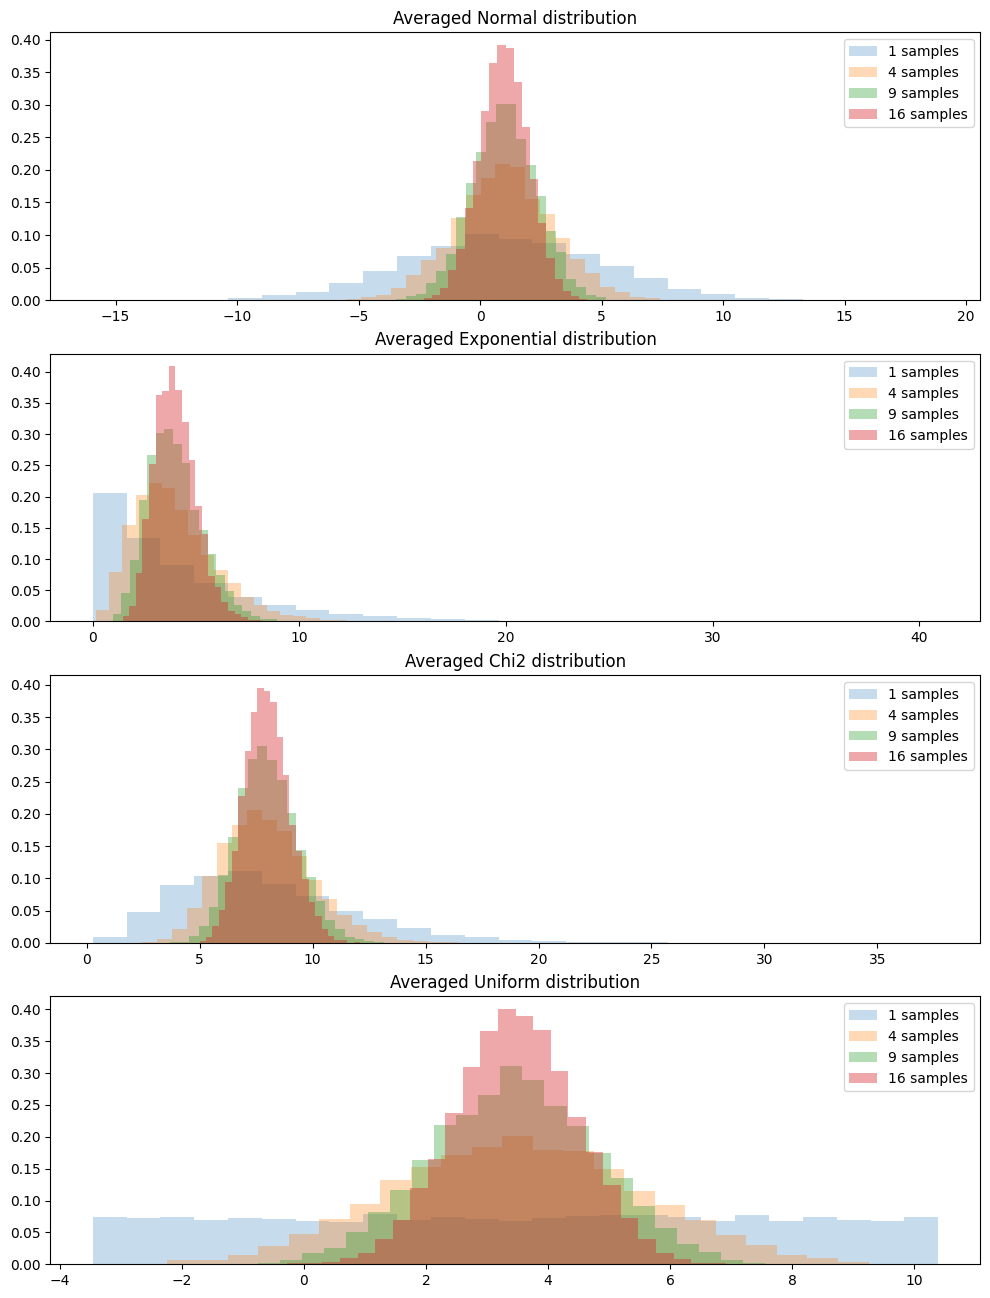

In [63]:
get_samples = lambda dist, size: dist.rvs(size=size)

num_iterations = 10000
Ns = [1, 4, 9, 16]
alphas = [0.25 + .05 * i for i in np.arange(4)]

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))
for plot_no, distribution, name in zip([0,1,2,3], distributions, names):
    for N, alpha in zip(Ns, alphas):
        averages = [
            np.mean(get_samples(distribution, N))
            for _ in range(num_iterations)
        ]
        ax[plot_no].hist(averages, bins=25, density=True, alpha=alpha, label=f'{N} samples')
    ax[plot_no].legend()
    ax[plot_no].set_title(f'Averaged {name} distribution')
plt.show()

# Arbitrary distribution sampling

Sometimes it may happen, that we need to sample from a custom distribution, not implemented in any standard library. There exist a simple algorithm for such sampling, provided that the distribution is bounded (pdf has finite support and maximum).


#### Accept-rejection sampling
Let the distribution be given by the pdf $g(x)$ and defined at interval $[a,b]$. In addition, let $M$ be the supremum of $g(x)$.

1. Take a sample $t$ from the uniform distribution at the interval $[a,b]$,
2. Take a sample $u$ from the uniform distribution at the interval $[0,M]$,
3. If $g(t) > u$ we accept $t$ as a sample taken from the original distribution. If not, we go back to 1.

## Ex 4. 
Implement function accept_rejection_sampling(dist, size = 1) which samples from any bounded distribution on the [0,1] interval.

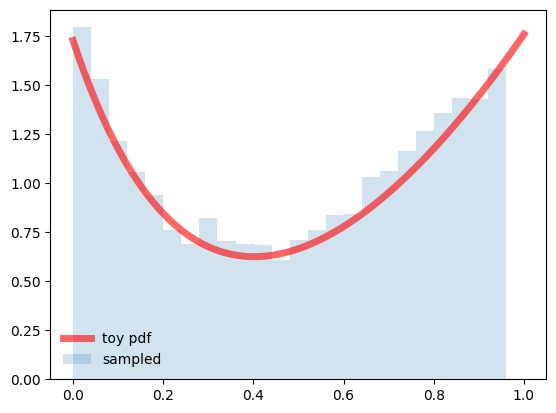

In [64]:
def toy_dist(x):
    C = 1/3 - np.exp(-4)/4 + 1/4
    return (x**2 + np.exp(-4*x)) / C 

a, b = 0, 1
x = np.linspace(a, b, 1000)

def accept_rejection_sampling(dist, size=1):
    #here goes your code
    samples = []
    M = max(dist)
    
    while len(samples) != size:
        t = uniform.rvs(a, b)
        u = uniform.rvs(0, M)
        if toy_dist(t) > u:
            samples.append(t)
    return samples

samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='toy pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = x[::40], label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

## Note:
    The samples from the custom distribution are correct

# Probability space matters!
## Ex 5
Sample 2000 points from the unit disk. Do it in following ways:
1. Assume uniform distribution of radius (0,1) and argument (0, 2 $\pi$),  
2. Assume uniform distribution of x and y coordinate (-1,1). Drop values laying outside of the disk.   
Explain differences. between 1. and 2. Then:
3. Modify the solution of point 1. by changing the distribution of the radius in such a way, that we result in 2D distribution from 2.

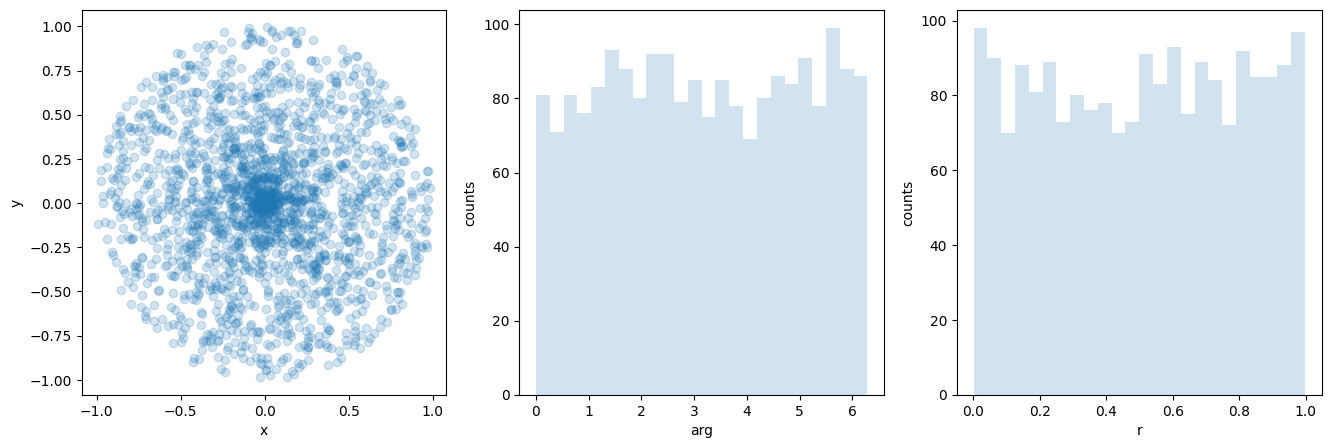

In [65]:
# Version1
# Assume uniform distribution of radius (0,1) and argument (0, 2 $\pi$)

uniform_radius = uniform(loc=0, scale=1)
uniform_argument = uniform(loc=0, scale=2*np.pi)

radius = uniform_radius.rvs(2000)
argument = uniform_argument.rvs(2000)

x = radius * np.sin(argument)
y = radius * np.cos(argument)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()

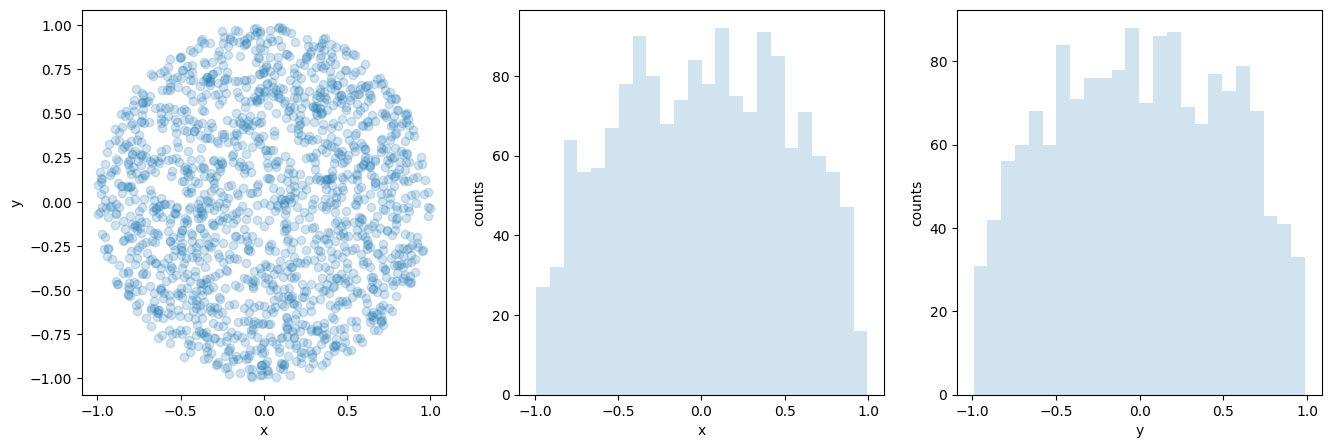

In [66]:
# Version2
# Assume uniform distribution of x and y coordinate (-1,1). 
# Drop values laying outside of the disk.

dist = uniform(loc=-1, scale=2)

x, y = [dist.rvs(2000) for _ in range(2)]
points = [(x_, y_) for x_, y_ in zip(x, y) if np.sqrt(x_*x_ + y_*y_) < 1]
x, y = zip(*points)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(x, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('x')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(y, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('y')
plt.ylabel('counts')

plt.show()

## Note:
    Overall, both methods will result in a set of points that are uniformly distributed over the unit disk, but the first method will produce a more even distribution of points because it takes into account the shape of the unit disk. The second method will produce a less even distribution due to the points being dropped.




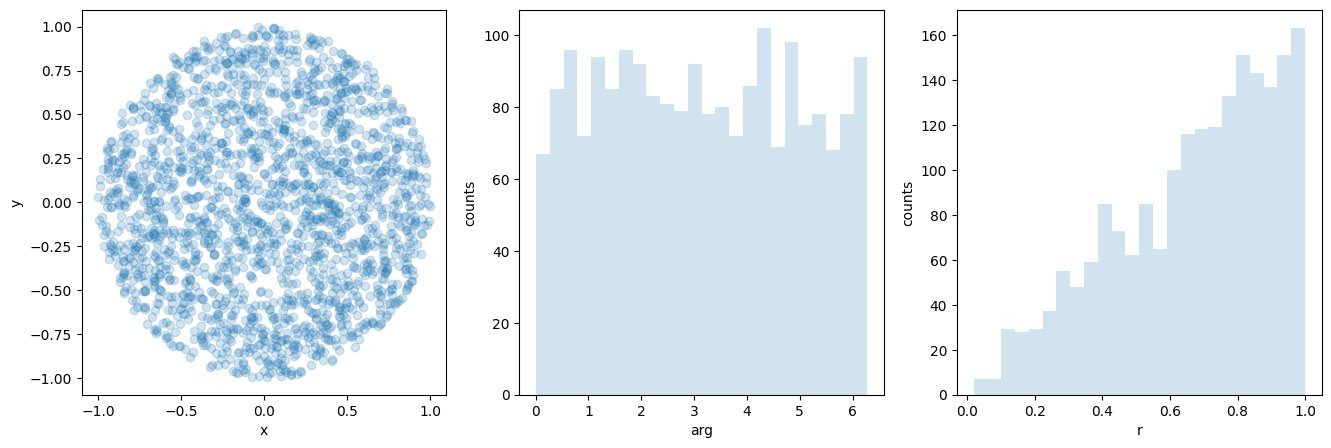

In [67]:
# Version3
# Modify the solution of point 1. by changing the distribution of the radius in such a way,
# that we result in 2D distribution from 2

uniform_radius = uniform(loc=0, scale=1)
uniform_argument = uniform(loc=0, scale=2*np.pi)

radius = np.sqrt(1 - uniform_radius.rvs(2000))
argument = uniform_argument.rvs(2000)

x = radius * np.sin(argument)
y = radius * np.cos(argument)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.hist(argument, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('arg')
plt.ylabel('counts')

plt.subplot(1, 3, 3)
plt.hist(radius, histtype='stepfilled', alpha=0.2, bins=24)
plt.xlabel('r')
plt.ylabel('counts')

plt.show()

## Application: Laplace equation, Dirichlet boundary conditions

#### Monte-Carlo procedure for solving 2D Laplace equation with Dirichlet boundary conditions
1. Start in a random position inside the boundaries,
2. With an equal probability move up/down/right/left until you hit the boundary,
3. After hitting the boundary we take the value $v_{b}$ of the function in the hitting point. We update the values of all points along the just finished random walk using the formula:
$$ v_{new} = \dfrac{nv_{old} + v_{b}}{n+1}, $$
where $n$ is a number of random walks which have already passed through this point.
4. Finish if the desired precision is achieved. If not, go back to 1.


A theory behind the above procedure can be found here:
https://www.uzh.ch/cmsssl/physik/dam/jcr:d559688c-1e7f-44ca-9fbe-aab0755c0b6e/empp18_MC_Markov.pdf

## Ex 6
Implement the method described above and solve numerically given Dirichlet problem. Plot few intermediate steps.

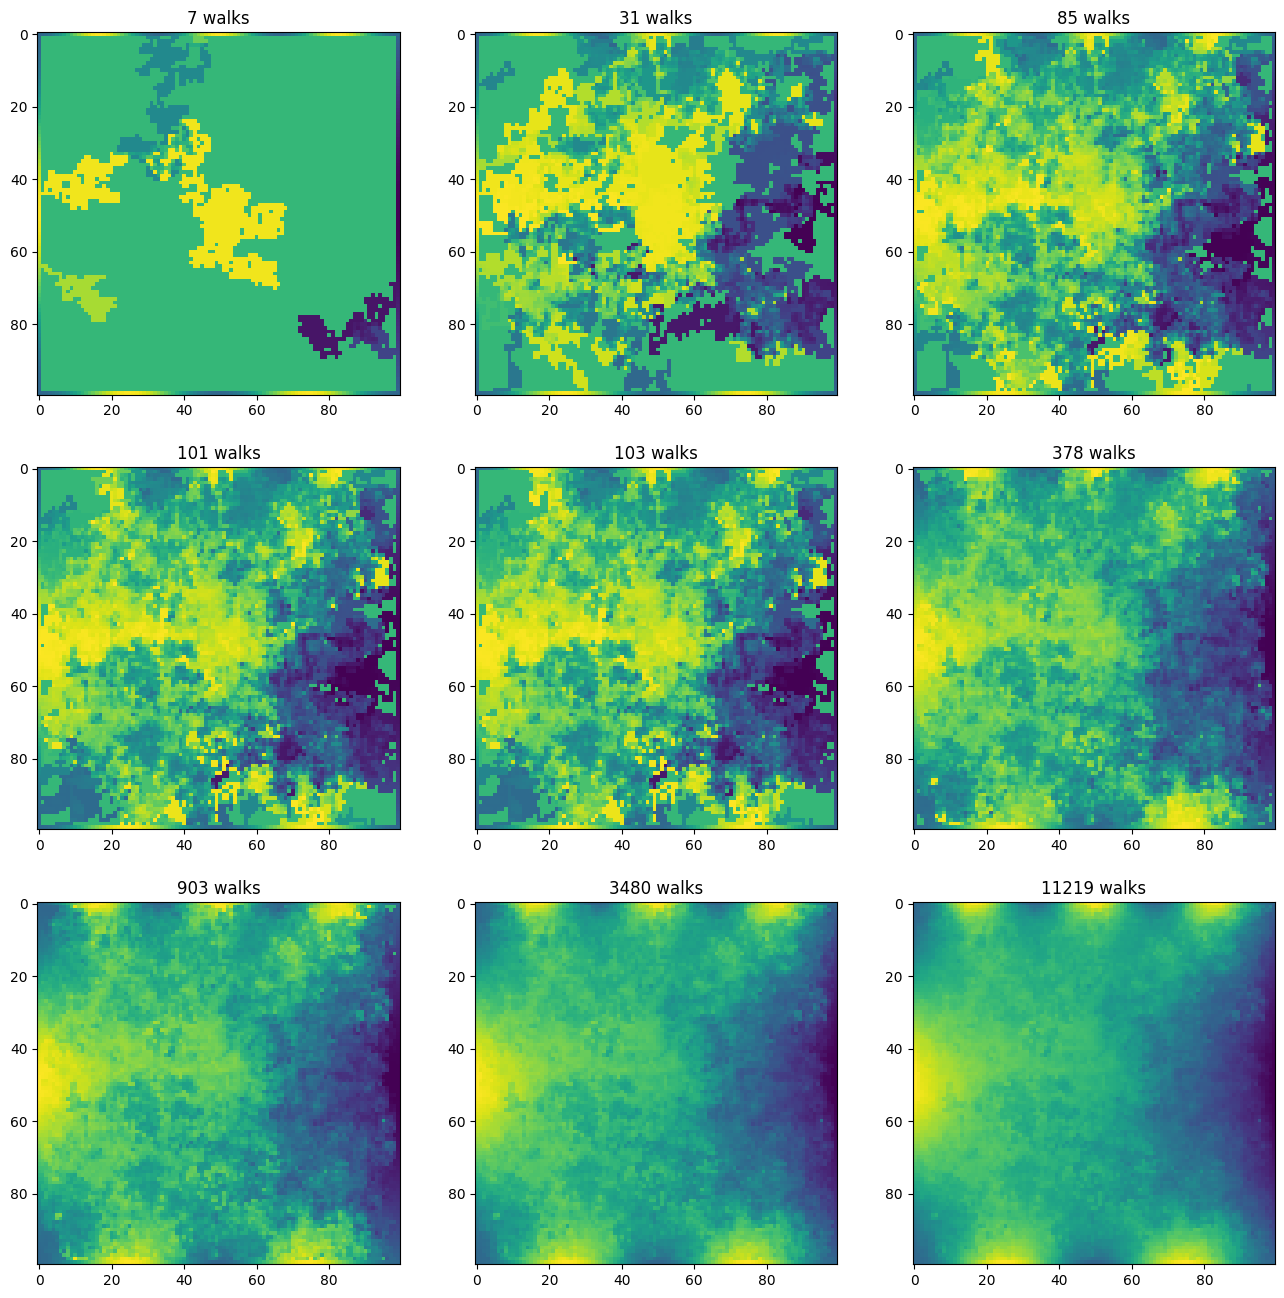

In [78]:
S = 100 
plane, plane_counts = np.zeros((S, S)), np.zeros((S, S))
plane[0] = np.cos(np.linspace(-1.5, 1.5, S)*2*np.pi)
plane[-1] = -np.cos(np.linspace(-1, 1, S)*2*np.pi)
plane[:, 0] = np.cos(np.linspace(-0.5, 0.5, S)*2*np.pi)
plane[:, -1] = -2+np.linspace(-1, 1, S)**2

directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]

plt.figure(figsize=(16, 16))
sub = 0

planes = [copy.deepcopy(plane)]

precision = 1e-7
relative_change = 1
relative_change_intervals = np.geomspace(precision, 1e-1, num=10, endpoint=True)[::-1]
intervals_iter = iter(relative_change_intervals)
interval = next(intervals_iter)
i = 0
while sub < 9:
    i+=1
    start_x, start_y = np.random.randint(1, S-1, 2)
    moves = []
    plane_counts_old = copy.deepcopy(plane_counts)
    while all([start_x > 0, start_x < S - 1, start_y > 0, start_y < S - 1]):
        plane_counts[start_y][start_x] += 1
        moves.append([start_y, start_x])
        direction = random.choice(directions)
        start_x, start_y = start_x + direction[1], start_y + direction[0]
    planes.append(copy.deepcopy(planes[-1]))
    for move in moves:
        planes[-1][move[0]][move[1]] = (
            (plane_counts_old[move[0]][move[1]] * planes[-2][move[0]][move[1]])
            + planes[-1][start_y][start_x]
        ) / (plane_counts_old[move[0]][move[1]] + 1)

    relative_change = np.linalg.norm(planes[-1]-planes[-2]) / np.linalg.norm(planes[-1])
    if relative_change < precision * 1e-10: continue
    if relative_change <= interval:
        sub += 1
        plt.subplot(3, 3, sub)
        plt.title(f'{len(planes)} walks')
        plt.imshow(planes[-1])
        interval = next(intervals_iter)
        print(f'Hit {sub} interval with precision: {relative_change:.5e}', end='\r')
plt.show()